## Exploratory Data Analysis

### Import Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast
import datetime
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("capstone.csv")
pd.set_option('display.max_columns', None)
df.head()

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,planing,sail,conditions,wind_number,wind
0,2023-05-21,5,7,8,6,6,5,5,2,18,13,24,19,19,11,8,5,18,17,17,19,20,18,18,16,0.1,,0.3,0.1,,0.1,0.5,0.5,100,100,100,74,92,100,100,70,237.0,231.0,270.0,280.0,279.0,405.0,210.0,279.0,0,4.5,Light wind day,2,1
1,2023-05-22,7,3,3,2,2,2,6,3,20,14,8,6,2,8,15,9,15,16,15,17,19,23,18,18,0.3,,0.3,0.1,,,0.3,,100,100,100,100,100,100,100,89,292.0,290.0,243.0,274.0,445.0,439.0,298.0,391.0,0,4.5,Longboard freestyle,2,1
2,2023-05-23,5,3,2,1,3,7,7,3,8,4,6,6,4,7,12,5,17,16,16,19,22,22,21,19,,,,,,,,,31,6,7,11,6,,8,100,489.0,287.0,267.0,266.0,384.0,443.0,447.0,466.0,4,4.4,Classic Vass,4,5
3,2023-05-24,1,2,2,2,3,7,7,2,4,1,5,2,3,9,9,6,18,17,16,19,22,22,22,19,,,,,,,,,100,100,15,6,,,,,326.0,276.0,310.0,416.0,427.0,460.0,475.0,188.0,4,5.7,Good Freeride,3,4
4,2023-05-25,2,2,2,2,3,6,4,4,3,4,3,5,2,7,7,6,18,18,17,20,23,23,23,19,,,,,,,,,,7,99,22,100,6,,72,535.0,223.0,277.0,261.0,418.0,459.0,513.0,237.0,1,6.5,A little blow,3,1


In [3]:
df.shape

(858, 53)

In [3]:
df.dtypes

date            object
ws_00           object
ws_03           object
ws_06           object
ws_09           object
ws_12           object
ws_15           object
ws_18           object
ws_21           object
wg_00           object
wg_03           object
wg_06           object
wg_09           object
wg_12           object
wg_15           object
wg_18           object
wg_21           object
t_00            object
t_03            object
t_06            object
t_09            object
t_12            object
t_15            object
t_18            object
t_21            object
r_00            object
r_03            object
r_06            object
r_09            object
r_12            object
r_15            object
r_18            object
r_21            object
cc_00           object
cc_03           object
cc_06           object
cc_09           object
cc_12           object
cc_15           object
cc_18           object
cc_21           object
wd_00          float64
wd_03          float64
wd_06      

> Create a copy to begin changing

In [4]:
df_copy = df.copy()

### Null Handling

#### Find nulls

In [5]:
df_copy.isnull().sum()

date             0
ws_00            0
ws_03            0
ws_06            0
ws_09            0
ws_12            0
ws_15            0
ws_18            0
ws_21            0
wg_00            0
wg_03            0
wg_06            0
wg_09            0
wg_12            0
wg_15            0
wg_18            0
wg_21            0
t_00             0
t_03             0
t_06             0
t_09             0
t_12             0
t_15             0
t_18             0
t_21             0
r_00             0
r_03             0
r_06             0
r_09             0
r_12             0
r_15             0
r_18             0
r_21             0
cc_00            0
cc_03            0
cc_06            0
cc_09            0
cc_12            0
cc_15            0
cc_18            0
cc_21            0
wd_00            8
wd_03           10
wd_06           13
wd_09           19
wd_12           20
wd_15           25
wd_18           46
wd_21          180
planing          0
sail             2
conditions       0
wind_number 

In [6]:
# Let's put these null values into a dataframe
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe) 
    null_vals = pd.DataFrame(null_vals,columns=['null']) 
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) 
    
    return null_vals.sort_values('percent', ascending=False)

In [7]:
null_vals(df_copy)

,null,percent
wd_21,180,20.979
wd_18,46,5.361
wd_15,25,2.914
wd_12,20,2.331
wd_09,19,2.214
wd_06,13,1.515
wd_03,10,1.166
wd_00,8,0.932
sail,2,0.233
cc_09,0,0.000


In [29]:
#pd.set_option('display.max_rows', None)
df_copy[df_copy.isnull().any(axis = 1)]

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,planing,sail,conditions,wind_number,wind,month


#### Filling with specific values

In [9]:
# Fill for 490
condition = df_copy.date.isin(['2023-06-03', '2023-06-20', '2023-07-23', '2023-07-28',
                        '2022-09-15', '2021-07-08', '2021-09-10', '2020-07-15',
                         '2020-07-22', '2020-07-29', '2020-07-30', '2020-07-27', '2020-09-10'
                         '2020-09-01', '2020-08-24', '2020-09-01'])

df_copy.loc[condition, 'wd_18'] = '490.0'

In [10]:
# Fill for 510
condition = df_copy.date.isin(['2023-07-12', '2023-07-19', '2022-07-01', '2022-07-16',
                               '2022-08-04'])

df_copy.loc[condition, 'wd_18'] = '510.0'

In [11]:
# 445 train 
condition = df_copy.date.isin(['2020-07-15', '2020-07-22', '2020-07-27', '2020-09-10',
                              '2020-09-01', '2020-08-24', '2020-07-30'])
 
df_copy.loc[condition, 'wd_15'] = '445.0'

#### Dropping rows

In [12]:
# Drop bad rows
condition = df_copy.date.isin(['2023-07-28', '2023-07-31', '2023-09-03', '2023-09-04',
                               '2021-09-11', '2020-09-04', '2020-09-03', '2020-09-02', 
                               '2020-08-27', '2020-08-26', '2020-08-25', '2020-08-01',
                               '2020-07-31'])
rows_to_keep = ~condition
df_copy = df_copy[rows_to_keep]

#### Forward fill remaining by row

In [13]:
# Fill remaining with prev. value
df_copy = df_copy.ffill(axis = 1)

In [14]:
df_copy.isnull().sum().sum()

0

#### Other characters

> all clear!

In [15]:
# Look for dashes
df_copy.eq('-').sum()

date           0
ws_00          0
ws_03          0
ws_06          0
ws_09          0
ws_12          0
ws_15          0
ws_18          1
ws_21          1
wg_00          0
wg_03          0
wg_06          0
wg_09          0
wg_12          0
wg_15          0
wg_18          1
wg_21          1
t_00           0
t_03           0
t_06           0
t_09           0
t_12           0
t_15           0
t_18           1
t_21           1
r_00           0
r_03           0
r_06           0
r_09           0
r_12           0
r_15           0
r_18           1
r_21           1
cc_00          0
cc_03          0
cc_06          0
cc_09          0
cc_12          0
cc_15          0
cc_18          1
cc_21          1
wd_00          0
wd_03          0
wd_06          0
wd_09          0
wd_12          0
wd_15          0
wd_18          0
wd_21          0
planing        0
sail           0
conditions     0
wind_number    0
wind           0
dtype: int64

In [16]:
def replace_dash_with_previous(row):
    previous_value = None
    for i, value in enumerate(row):
        if value == '-':
            if previous_value is not None:
                row[i] = previous_value
        else:
            previous_value = value
    return row

# Apply the function to each row
df_copy = df_copy.apply(replace_dash_with_previous, axis=1)

In [17]:
# Look for spaces
df_copy.eq(' ').sum()

date             0
ws_00            0
ws_03            0
ws_06            0
ws_09            0
ws_12            0
ws_15            0
ws_18            0
ws_21            0
wg_00            0
wg_03            0
wg_06            0
wg_09            0
wg_12            0
wg_15            0
wg_18            0
wg_21            0
t_00             0
t_03             0
t_06             0
t_09             0
t_12             0
t_15             0
t_18             0
t_21             0
r_00           790
r_03           782
r_06           789
r_09           789
r_12           801
r_15           807
r_18           802
r_21           783
cc_00          591
cc_03          586
cc_06          590
cc_09          587
cc_12          596
cc_15          595
cc_18          598
cc_21          577
wd_00            0
wd_03            0
wd_06            0
wd_09            0
wd_12            0
wd_15            0
wd_18            0
wd_21            0
planing          0
sail             0
conditions       0
wind_number 

In [18]:
df_copy = df_copy.replace(' ', '0')

### Datatypes

In [19]:
df_copy.dtypes

date            object
ws_00           object
ws_03           object
ws_06           object
ws_09           object
ws_12           object
ws_15           object
ws_18           object
ws_21           object
wg_00           object
wg_03           object
wg_06           object
wg_09           object
wg_12           object
wg_15           object
wg_18           object
wg_21           object
t_00            object
t_03            object
t_06            object
t_09            object
t_12            object
t_15            object
t_18            object
t_21            object
r_00            object
r_03            object
r_06            object
r_09            object
r_12            object
r_15            object
r_18            object
r_21            object
cc_00           object
cc_03           object
cc_06           object
cc_09           object
cc_12           object
cc_15           object
cc_18           object
cc_21           object
wd_00          float64
wd_03          float64
wd_06      

In [20]:
df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m-%d')

In [21]:
df_copy['wd_15'] = pd.to_numeric(df_copy['wd_15'])
df_copy['wd_18'] = pd.to_numeric(df_copy['wd_18'])

In [22]:
df_copy[['ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18', 'ws_21', 
        'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18', 'wg_21',
        't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21', 
        'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21',
        'cc_00', 'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21']] = df_copy[['ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18', 'ws_21', 
                                                                                            'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18', 'wg_21',
                                                                                            't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21', 
                                                                                            'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21',
                                                                                            'cc_00', 'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21']].apply(pd.to_numeric)

### Dates

In [23]:
df_copy['month'] = df_copy['date'].dt.month

### New Target Col

In [110]:
df_copy['category'] = df['new_col'] = pd.cut(df['wind_number'], bins=[0, 3, 5, 8], labels=[0, 1, 2], right=False)

In [111]:
df_copy.head(20)

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,planing,sail,conditions,wind_number,wind,month,category
0,2023-05-21,5,7,8,6,6,5,5,2,18,13,24,19,19,11,8,5,18,17,17,19,20,18,18,16,0.1,0.0,0.3,0.1,0.0,0.1,0.5,0.5,100,100,100,74,92,100,100,70,237.0,231.0,270.0,280.0,279.0,405.0,210.0,279.0,0,4.5,Light wind day,2,1,5,0
1,2023-05-22,7,3,3,2,2,2,6,3,20,14,8,6,2,8,15,9,15,16,15,17,19,23,18,18,0.3,0.0,0.3,0.1,0.0,0.0,0.3,0.0,100,100,100,100,100,100,100,89,292.0,290.0,243.0,274.0,445.0,439.0,298.0,391.0,0,4.5,Longboard freestyle,2,1,5,0
2,2023-05-23,5,3,2,1,3,7,7,3,8,4,6,6,4,7,12,5,17,16,16,19,22,22,21,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,6,7,11,6,0,8,100,489.0,287.0,267.0,266.0,384.0,443.0,447.0,466.0,4,4.4,Classic Vass,4,5,5,1
3,2023-05-24,1,2,2,2,3,7,7,2,4,1,5,2,3,9,9,6,18,17,16,19,22,22,22,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,100,15,6,0,0,0,0,326.0,276.0,310.0,416.0,427.0,460.0,475.0,188.0,4,5.7,Good Freeride,3,4,5,1
4,2023-05-25,2,2,2,2,3,6,4,4,3,4,3,5,2,7,7,6,18,18,17,20,23,23,23,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,99,22,100,6,0,72,535.0,223.0,277.0,261.0,418.0,459.0,513.0,237.0,1,6.5,A little blow,3,1,5,1
5,2023-05-26,2,1,5,1,4,7,6,4,6,4,4,2,2,9,7,7,19,18,18,21,23,23,20,20,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,7,17,7,12,10,8,100,100,366.0,187.0,204.0,400.0,451.0,240.0,207.0,207.0,0,7.5,Longboard racing,2,1,5,0
6,2023-05-27,2,2,4,4,3,6,7,8,2,4,6,10,7,5,12,15,18,19,18,21,23,24,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,59,13,14,18,100,100,100,204.0,241.0,252.0,303.0,361.0,465.0,508.0,518.0,3,4.4,Strong off shore,4,5,5,1
7,2023-05-28,3,1,2,3,4,7,6,3,5,3,4,7,3,8,7,5,19,19,18,21,23,24,23,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,75,9,34,0,7,0,0,228.0,265.0,321.0,403.0,445.0,471.0,517.0,517.0,2,5.3,Nice cross shore,4,1,5,1
8,2023-05-29,2,3,4,4,5,7,5,2,1,2,4,9,7,6,9,1,20,19,18,20,23,23,22,21,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,8,11,9,13,12,0,0,100,283.0,271.0,318.0,308.0,330.0,403.0,442.0,231.0,0,5,Improvers loving it!,1,2,5,0
9,2023-05-30,4,6,5,4,5,6,3,4,5,8,11,8,5,4,5,7,19,19,18,20,22,22,23,20,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.1,79,23,11,9,82,19,13,0,275.0,272.0,286.0,316.0,344.0,379.0,437.0,459.0,1,7.5,Little blow,2,3,5,0


### Save Cleaned Dataframe

In [112]:
df_copy.to_csv('capstone_clean.csv', index=False)

### Exploring the data

#### Corellations

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


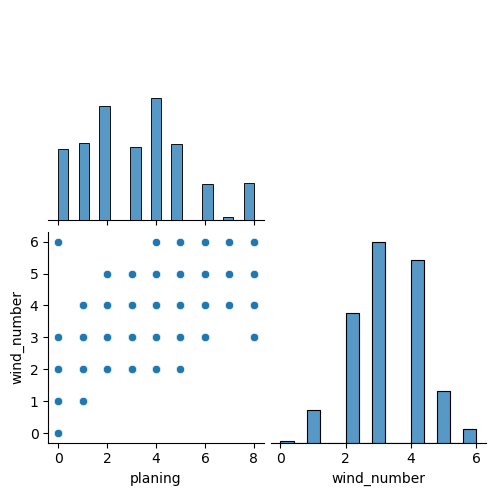

In [95]:
sns.pairplot(data = df_copy[['planing', 'wind_number']], 
             corner = True)
plt.show()

> wind_number looks like a decent target!

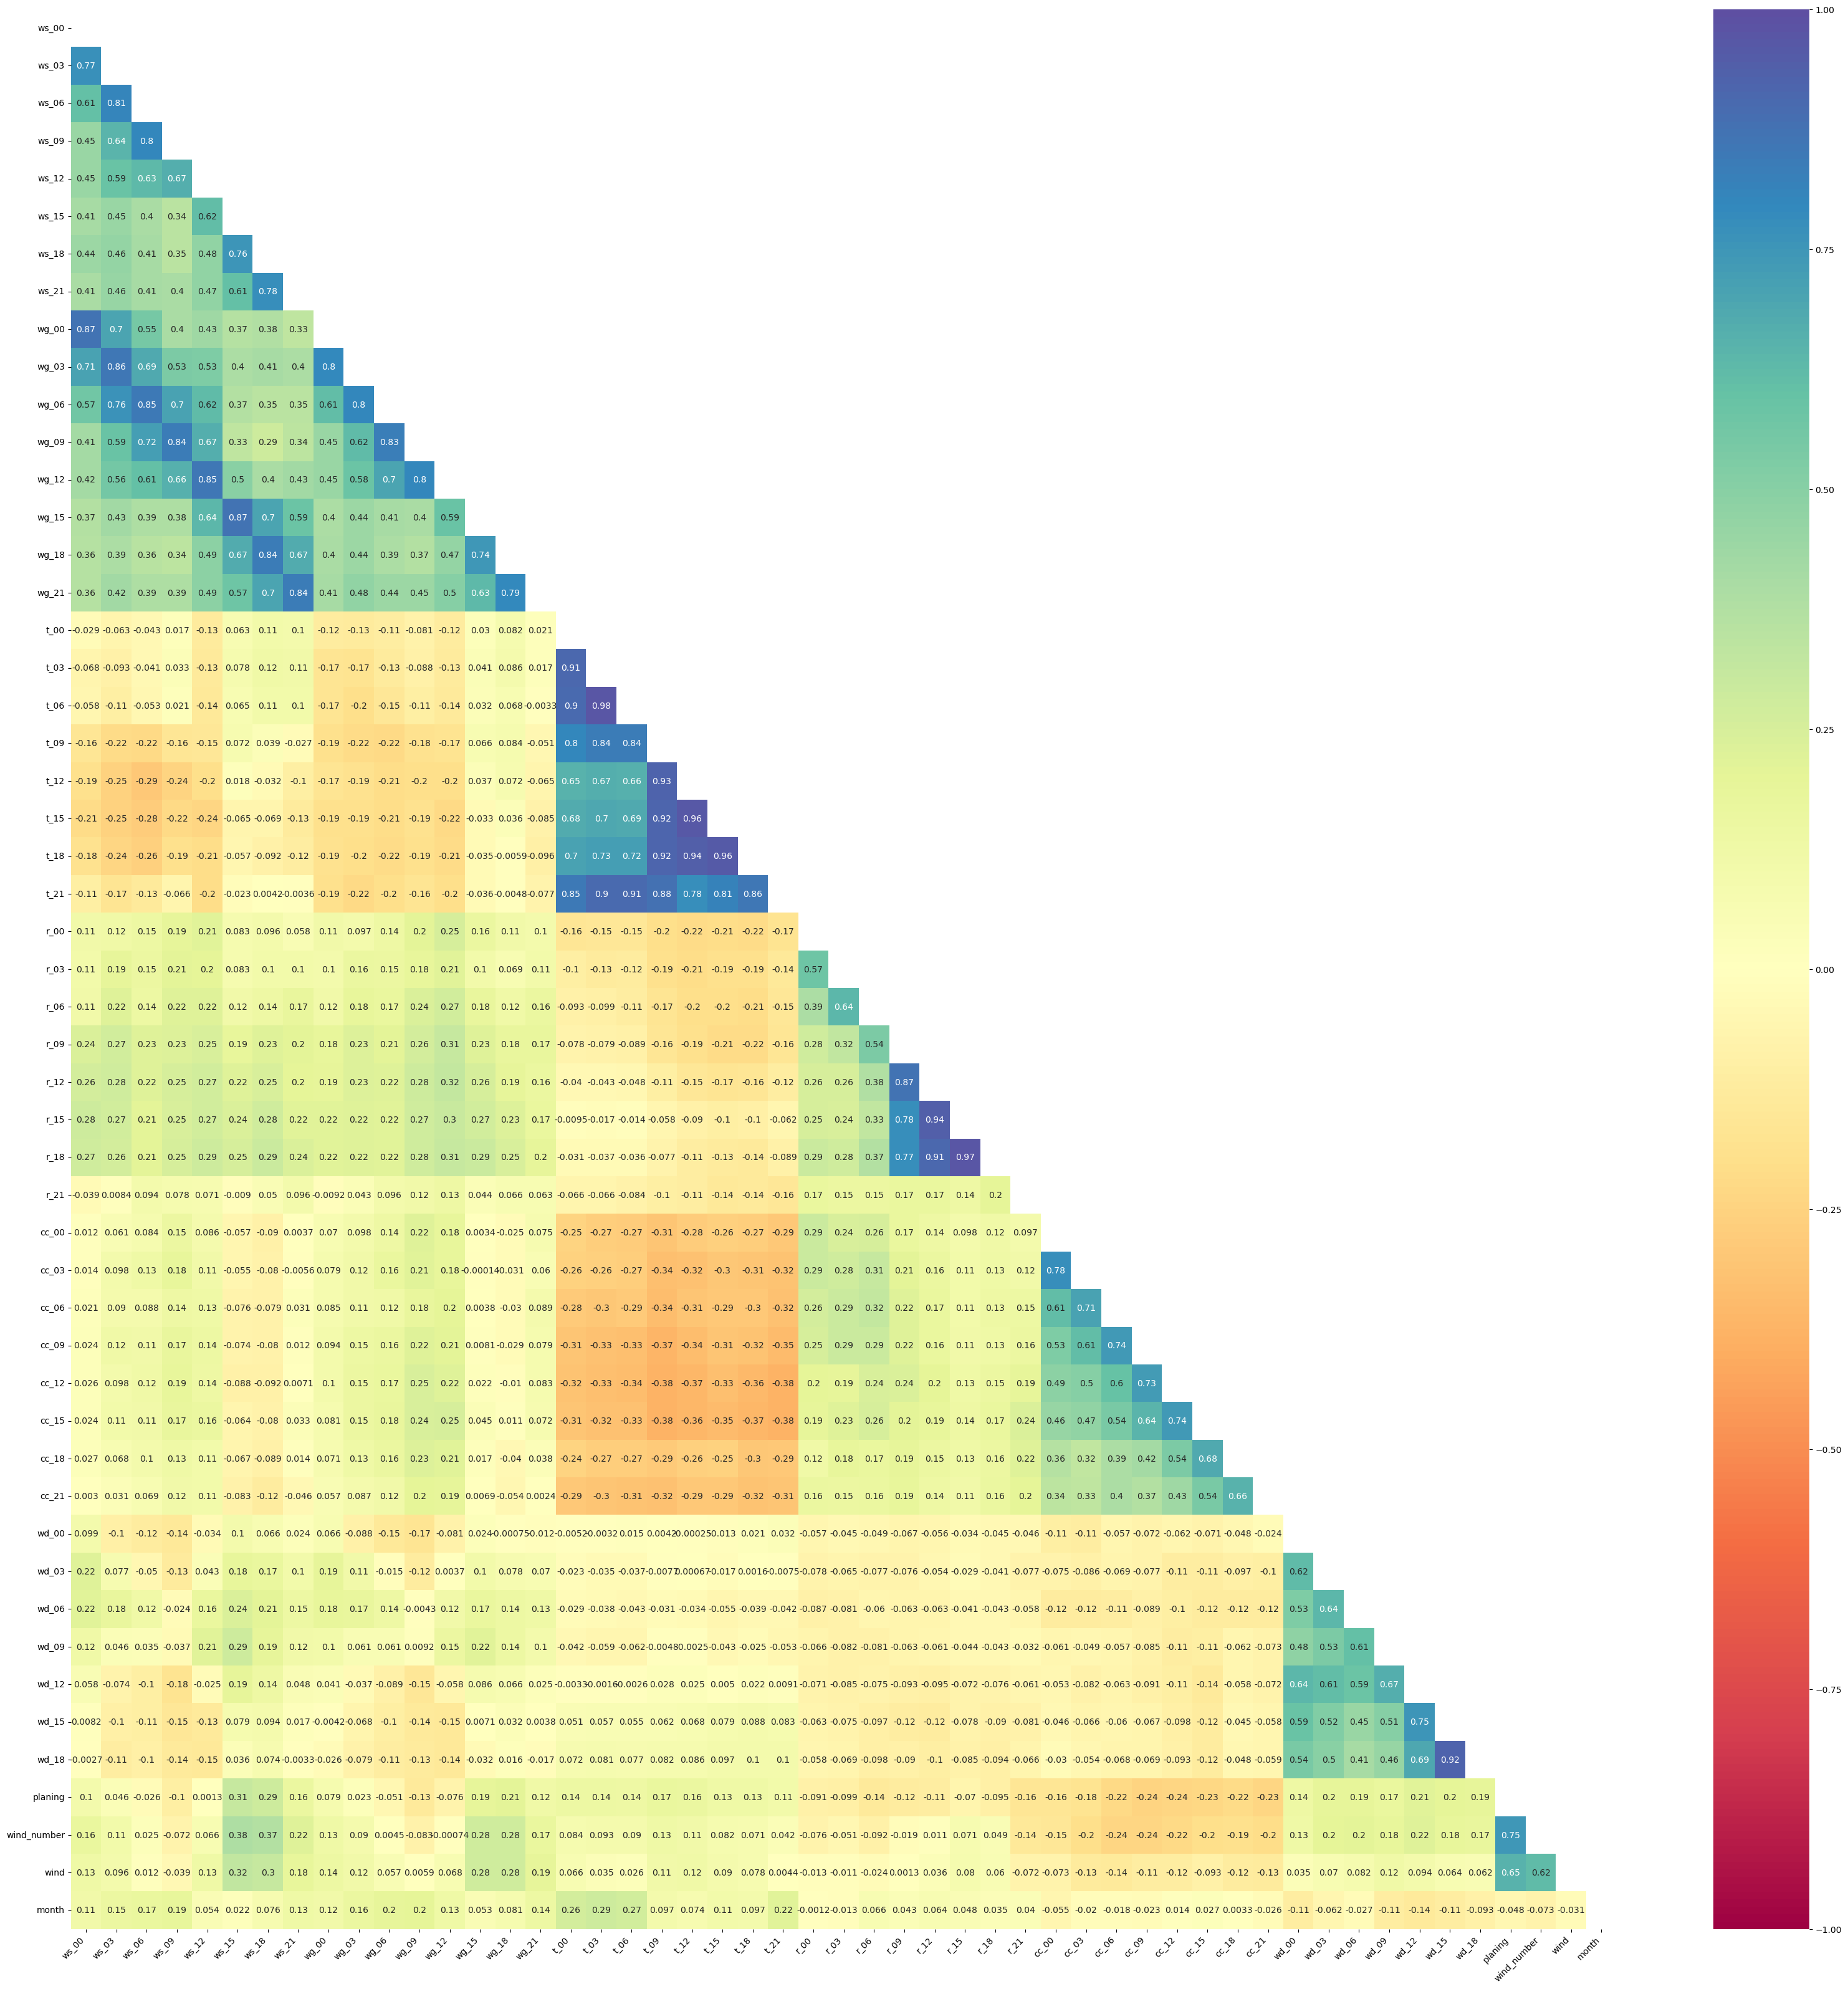

In [96]:
# Creating a correlation heatmap for all columns
plt.figure(figsize = (40, 40))
sns.heatmap(df_copy.corr(numeric_only=True),
            annot = True,
            vmin=-1,
            vmax=1,
            cmap ="Spectral",
            mask = np.triu(df_copy.corr(numeric_only=True)))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

> Some suprising correlations here  
* Wind Direction not as important as expected.
* Cloud cover potentially useful feature but rain not so much.
* Wind Speed and Gusts at 15.00 - 18.00 useful.
* Temp not as important as expected.

#### Wind Speed Distributions

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


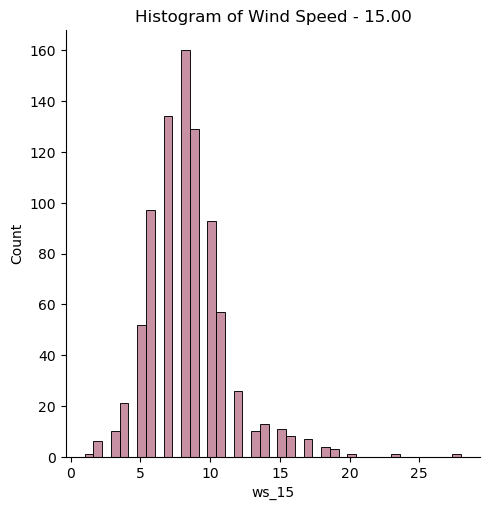

In [97]:
# Creating a histogram of wind speed distribution at 15.00
sns.displot(data = df_copy['ws_15'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Wind Speed - 15.00') 
plt.show()

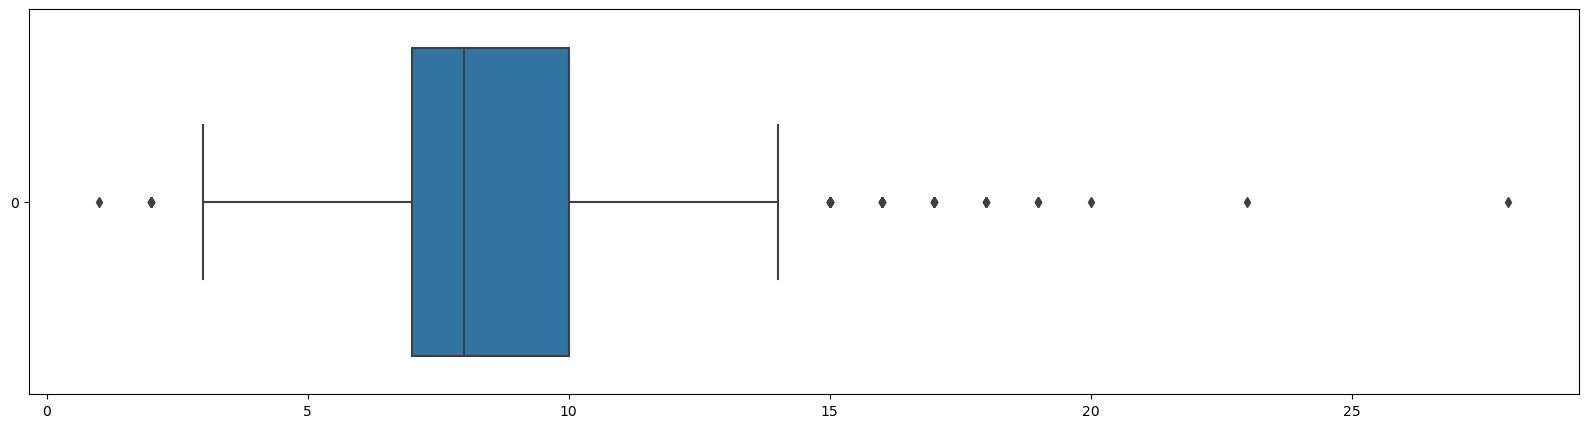

In [98]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df_copy['ws_15'],
            orient = 'h')
plt.show()

> All wind speed times have a relatively normal distribution, with several outliers - let's compare the wind at 15.00 to the wind_number label.

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


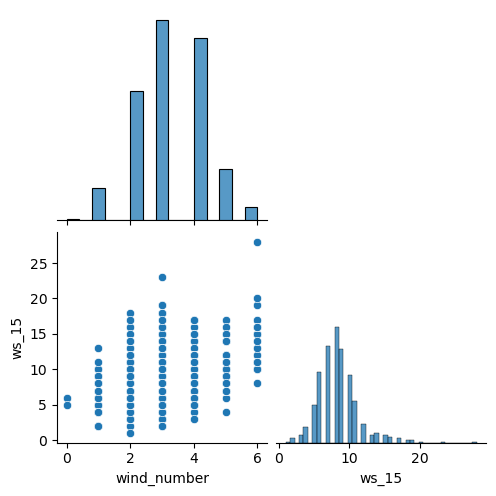

In [99]:
sns.pairplot(data = df_copy[['wind_number', 'ws_15']], 
             corner = True)
plt.show()

#### Wind Gusts Distribution

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


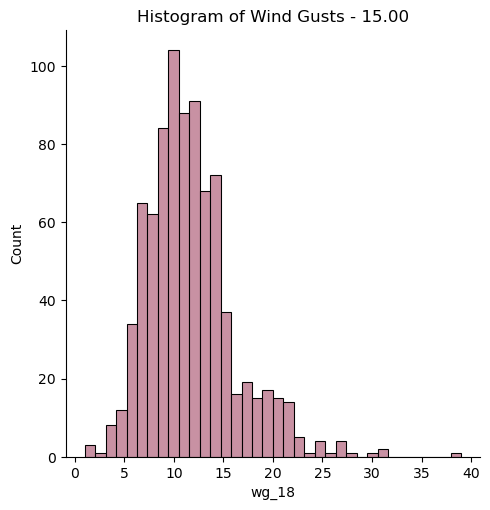

In [100]:
# Creating a histogram of wind gust distribution at 15.00
sns.displot(data = df_copy['wg_18'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Wind Gusts - 15.00') 
plt.show()

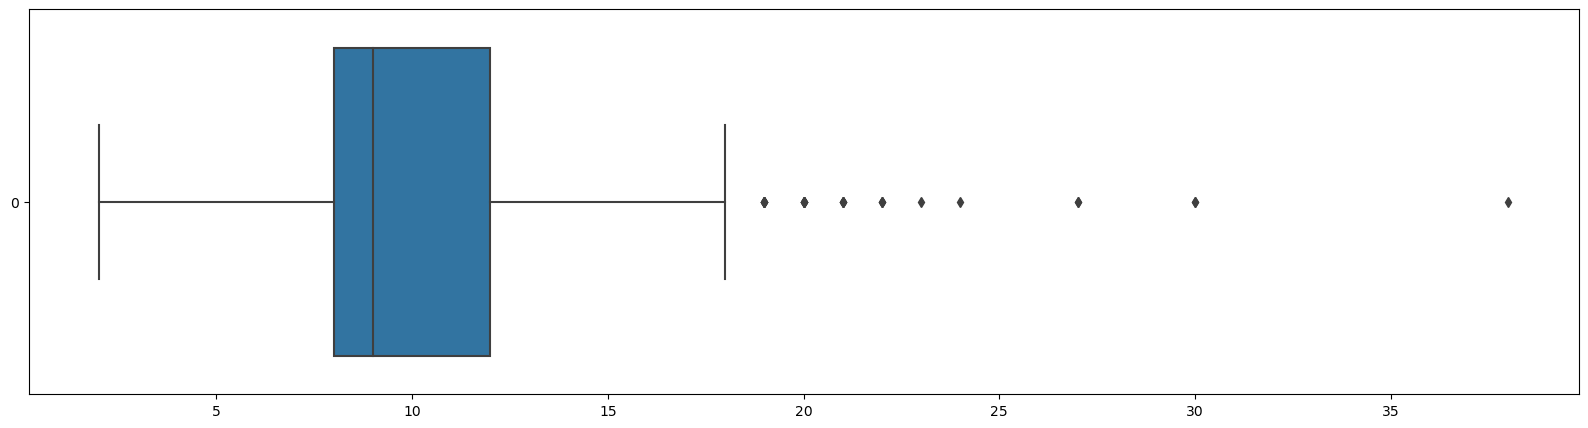

In [101]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df_copy['wg_15'],
            orient = 'h')
plt.show()

> Another fairly normal distribution, with outliers.

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


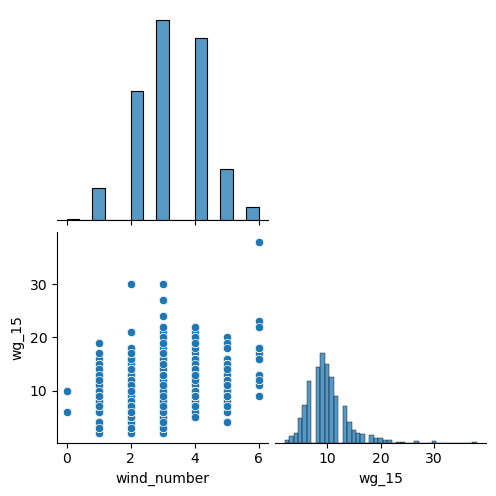

In [102]:
sns.pairplot(data = df_copy[['wind_number', 'wg_15']], 
             corner = True)
plt.show()

#### Wind Direction Distribution

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


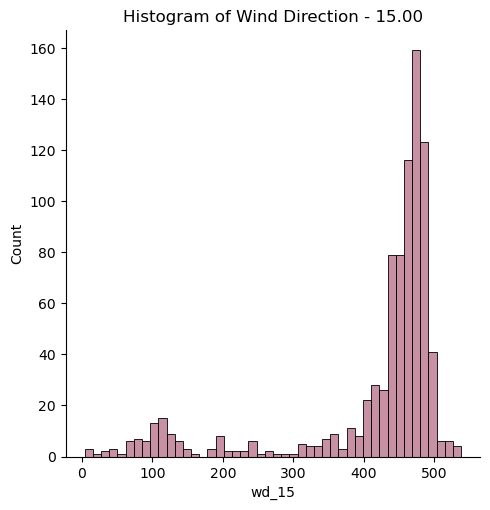

In [103]:
# Creating a histogram of wind direction distribution at 15.00
sns.displot(data = df_copy['wd_15'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Wind Direction - 15.00') 
plt.show()

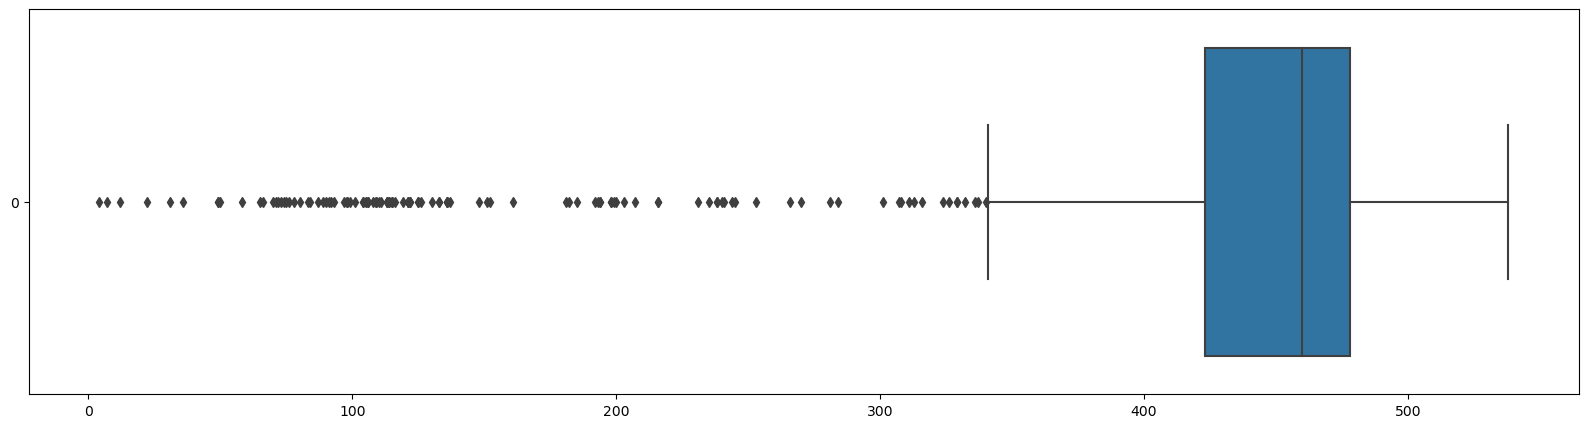

In [104]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df_copy['wd_15'],
            orient = 'h')
plt.show()

> We can see two distributions here - cross-shore and not cross-shore!

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


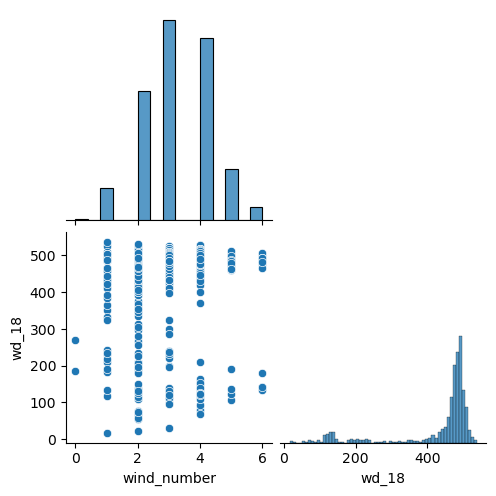

In [105]:
sns.pairplot(data = df_copy[['wind_number', 'wd_18']], 
             corner = True)
plt.show()

> Interesting... definitely not linear, apparent split in the data.

#### Temperature Distribution

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


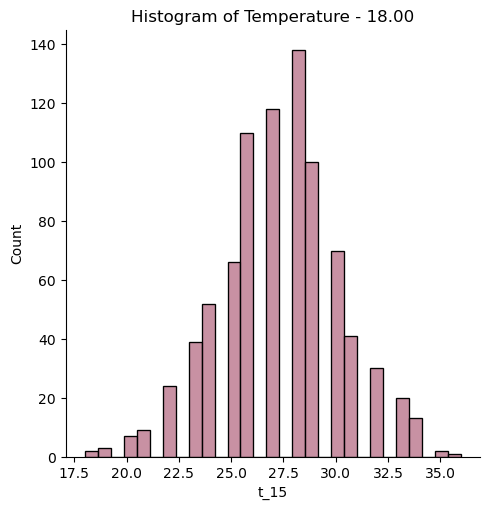

In [106]:
# Creating a histogram of wind direction distribution at 15.00
sns.displot(data = df_copy['t_15'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Temperature - 18.00') 
plt.show()

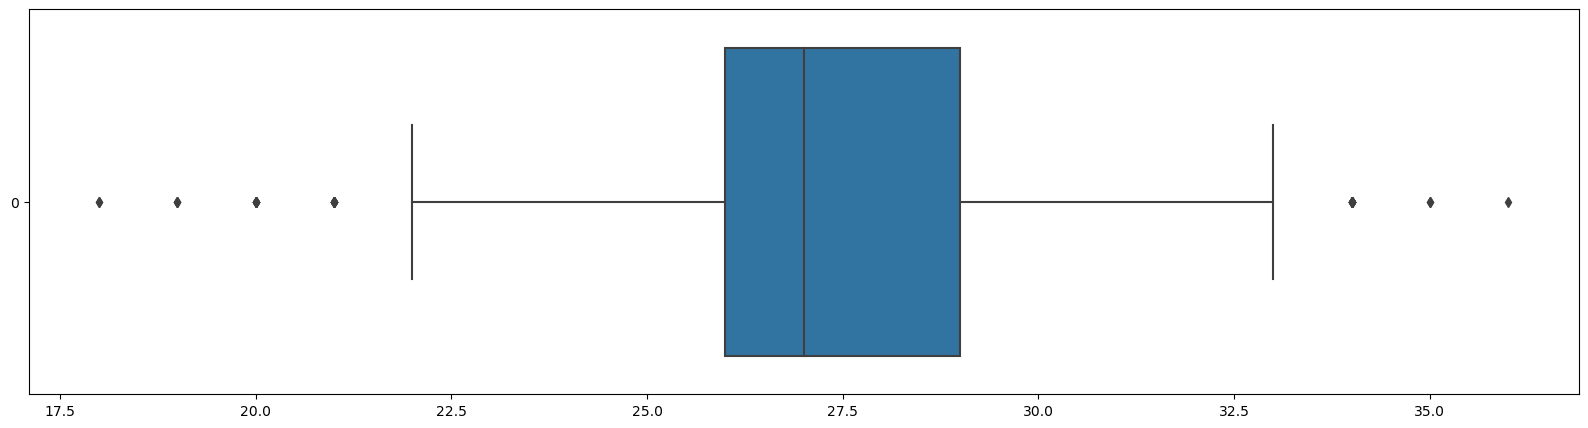

In [107]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df_copy['t_15'],
            orient = 'h')
plt.show()

> As expected, a fairly normal distribution with a few outliers.

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


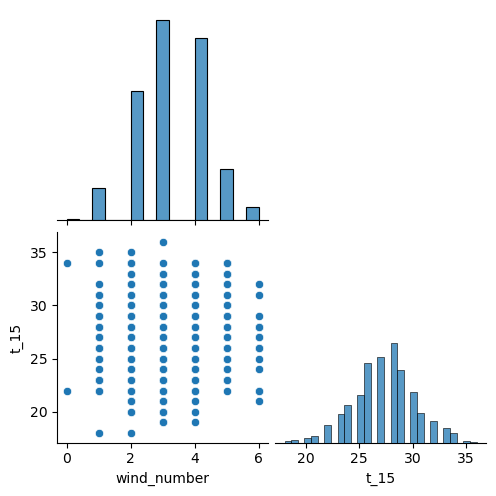

In [108]:
sns.pairplot(data = df_copy[['wind_number', 't_15']], 
             corner = True)
plt.show()

> Not much correlation here.

#### Cloud Cover Distribution

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


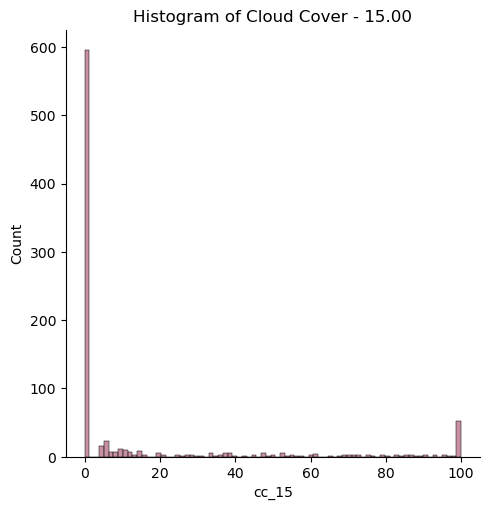

In [109]:
# Creating a histogram of cloud cover distribution at 15.00
sns.displot(data = df_copy['cc_15'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Cloud Cover - 15.00') 
plt.show()

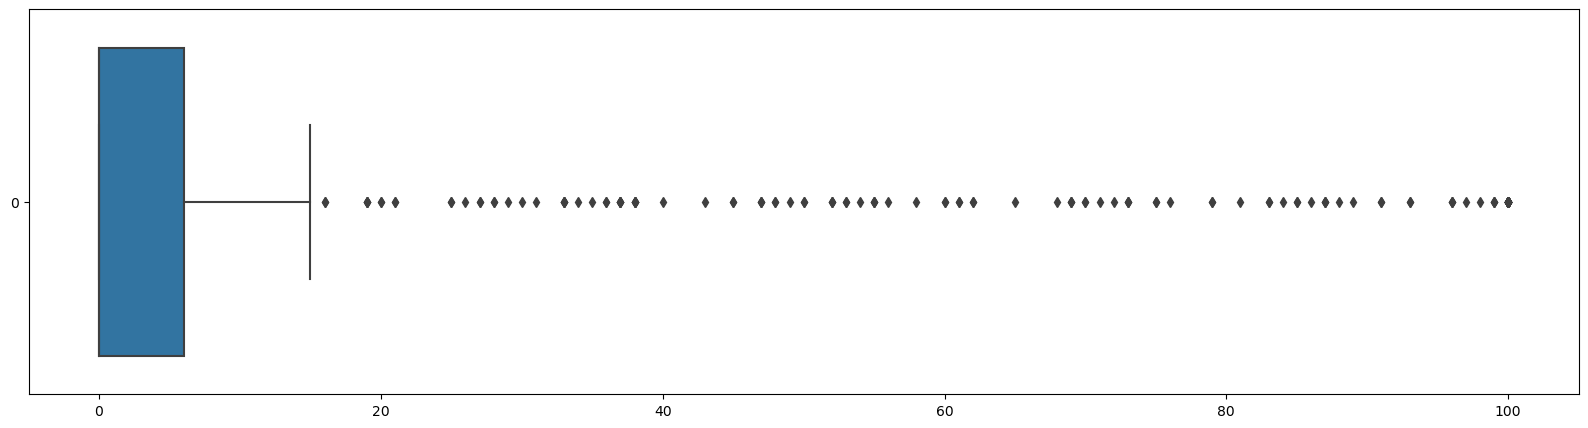

In [87]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df_copy['cc_15'],
            orient = 'h')
plt.show()

> Really uneven distribution - heavily biased towards 0.

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


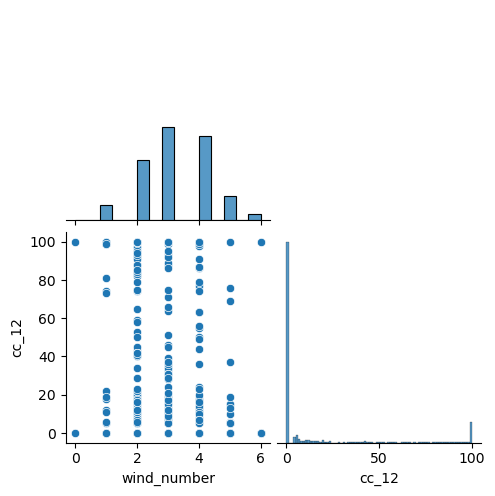

In [88]:
sns.pairplot(data = df_copy[['wind_number', 'cc_12']], 
             corner = True)
plt.show()

> Another apparent split in the distributions - best suited to a decision tree.

#### Rain Distribution

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


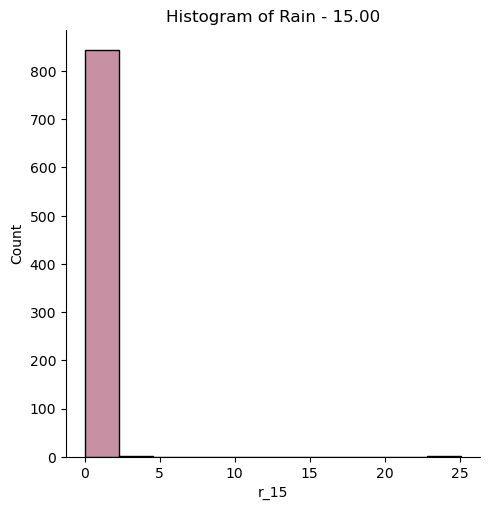

In [89]:
# Creating a histogram of rain distribution at 15.00
sns.displot(data = df_copy['r_15'],
            height = 5,
            color = '#b66c85')

plt.title('Histogram of Rain - 15.00') 
plt.show()

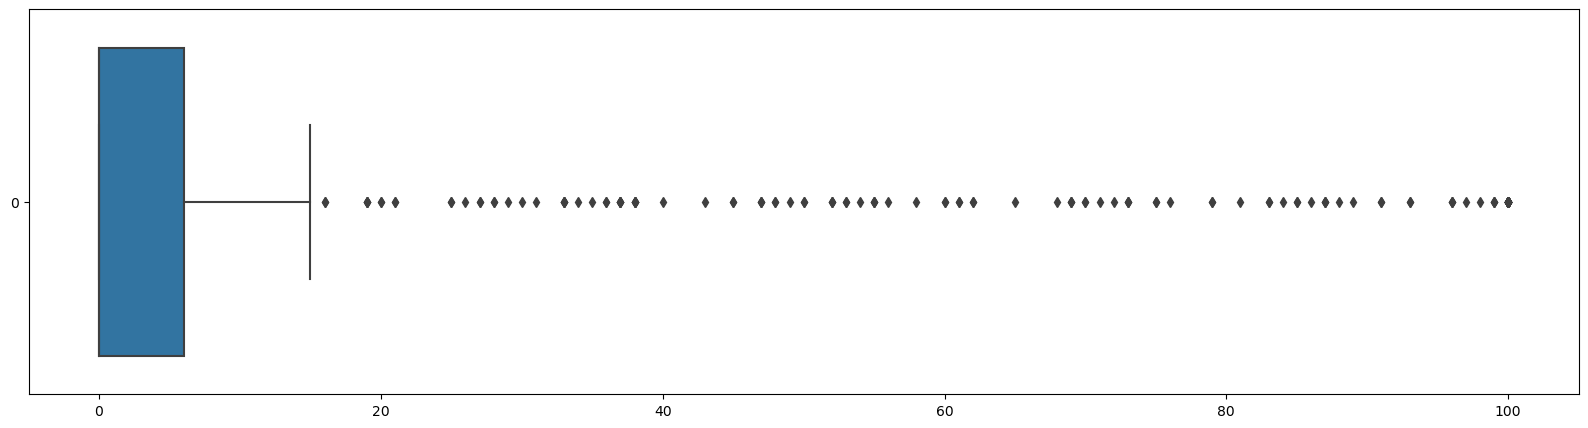

In [90]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df_copy['cc_15'],
            orient = 'h')
plt.show()

> Very similar distribution to cloud cover.

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


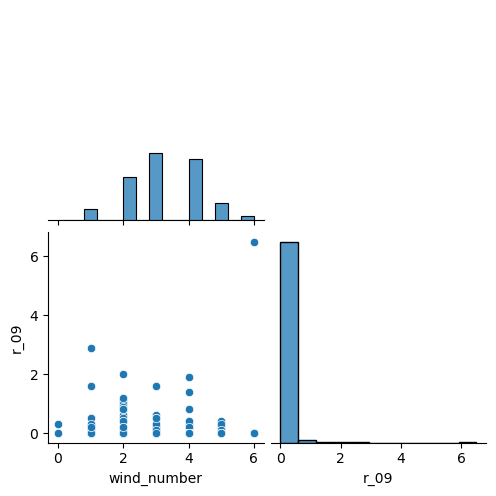

In [91]:
sns.pairplot(data = df_copy[['wind_number', 'r_09']], 
             corner = True)
plt.show()

> We can generally see lower wind speeds with more rain, with the exeception of the point to the top right -- this was a big storm!